In [445]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [446]:
# House Prices Prediction

In [447]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split

In [448]:
# Load training and test data sets
train_dt=pd.read_csv("/content/drive/MyDrive/msc_training_dataset.csv")
test_dt=pd.read_csv("/content/drive/MyDrive/msc_testing_dataset.csv")

In [449]:
# Display the first few rows of the training dataset
train_dt.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [450]:
# Display information about the training dataset
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [451]:
# Display summary statistics of the training data
train_dt.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [452]:
# Get the summary statistics of the 'price' column in the train_dt DataFrame
train_dt['price'].describe()

count     3000.000000
mean      8606.600000
std       2216.248563
min       2235.000000
25%       7005.000000
50%       8615.000000
75%      10215.000000
max      15035.000000
Name: price, dtype: float64

In [453]:
# Display information about the test dataset
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [454]:
# Display summary statistics of test data
test_dt.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [455]:
# split the input data into predictor variables (X) and the target variable (Y)
X_train = train_dt.drop('price',axis=1)
X_test = test_dt.drop('price',axis=1)
Y_train = train_dt['price']
Y_test = test_dt['price']

In [456]:
# Display the first few rows of the training dataset
X_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [457]:
# View Y_Train
Y_train

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

In [458]:
# Train the linear regression model
Lr = LinearRegression().fit(X_train,Y_train)
Lr

LinearRegression()

In [459]:
# Use linear regression model Lr to predict the target variable (price) for the X_test data, based on the features in X_test
Pred_X = Lr.predict(X_test)

In [460]:
# Predicted data for Linear Regression
Pred_X

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [461]:
# Create a new column for the predicted price
test_dt['Pred_X'] = Lr.predict(X_test)
test_dt

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Pred_X
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10075.0
995,5,1,2,3,1,1,0,0,0,0,0,9788,9775.0
996,3,2,2,1,0,1,1,1,0,1,0,9388,9375.0
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.0


In [462]:
# Create a new column for the difference between the actual price and the predicted price
test_dt['price_difference'] = test_dt['price'] - test_dt['Pred_X']
test_dt

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Pred_X,price_difference
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0,13.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0,13.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0,13.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0,13.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,10075.0,13.0
995,5,1,2,3,1,1,0,0,0,0,0,9788,9775.0,13.0
996,3,2,2,1,0,1,1,1,0,1,0,9388,9375.0,13.0
997,3,2,1,1,1,0,0,1,1,0,0,8528,8515.0,13.0


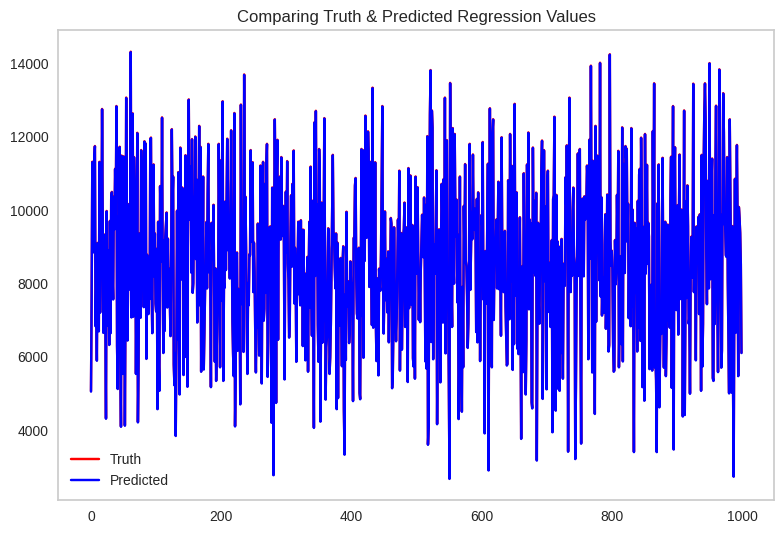

In [463]:
# Generate plot comparing the true values (Y_test) and the predicted values (Pred_X) of a regression model
def mt_plot(truth, prediction):
    plt.plot(truth, color="red", label="Truth")
    plt.plot(prediction, color="blue", label="Predicted")
    plt.legend()
    plt.grid()
    plt.title("Comparing Truth & Predicted Regression Values")
    plt.tight_layout()
    plt.show()
mt_plot(Y_test, Pred_X)

In [464]:
# Calculate the importance of each feature in the model by looking at the coefficients
coef_sum = np.sum(Lr.coef_)
featr_imprtncs = pd.DataFrame((Lr.coef_ / coef_sum) * 100, index=X_train.columns, 
                                   columns=['Importance (%)']).sort_values('Importance (%)', ascending=False)
total_importance = sum(featr_imprtncs['Importance (%)'])
featr_imprtncs['Importance %'] = round((featr_imprtncs['Importance (%)'] / total_importance) * 100, 4)
featr_imprtncs.drop('Importance (%)', axis=1, inplace=True)
featr_imprtncs = featr_imprtncs.rename(columns={'Importance': 'Importance %'})
print(featr_imprtncs)

              Importance %
furnished          20.9205
woodfloor          19.7699
solar_power        16.0042
room               10.4603
club_access         7.6360
backyard            5.8577
kitchen             5.2301
qlm_security        4.6025
green_paint         3.8703
bathroom            3.1381
french_door         2.5105


In [465]:
# Evaluate the performance of the model on the testing data
print('R2 Score: {:.4f}'.format(r2_score(Y_test, Pred_X)))
print('Mean Squared Error: {:.4f}'.format(mean_squared_error(Y_test, Pred_X)))
print('Root Mean Squared Error: {:.4f}'.format(sqrt(mean_squared_error(Y_test, Pred_X))))
print('Mean Absolute Error: {:.4f}'.format(mean_absolute_error(Y_test, Pred_X)))

R2 Score: 1.0000
Mean Squared Error: 169.0000
Root Mean Squared Error: 13.0000
Mean Absolute Error: 13.0000


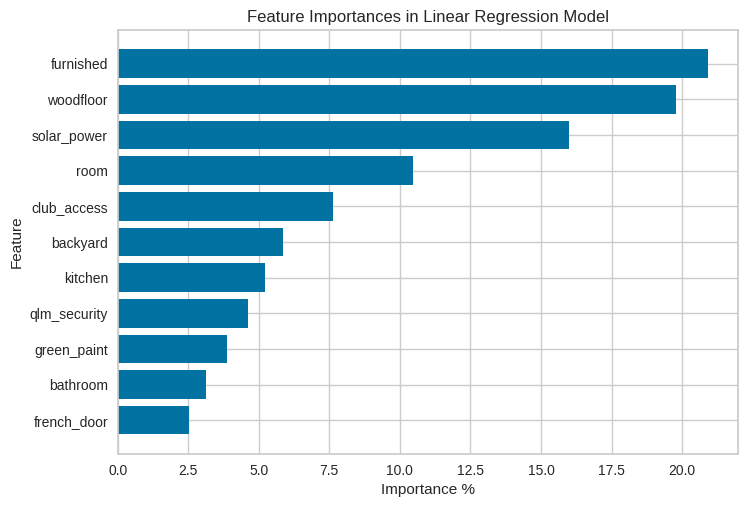

In [466]:
# Plot horizontal bar chart of feature importances in ascending order
plt.barh(featr_imprtncs.index, featr_imprtncs['Importance %'])
plt.xlabel('Importance %')
plt.ylabel('Feature')
plt.title('Feature Importances in Linear Regression Model')
plt.gca().invert_yaxis()
plt.show()

In [467]:
# Perform cross-validation to estimate model performance on new data, and monitor model performance over time
from sklearn.model_selection import cross_val_score

# Perform a 5-fold cross-validation to estimate the model performance
scores = cross_val_score(Lr, X_train, Y_train, cv=5, scoring='r2')

# Print average R-squared score
print('Average R-squared score:', np.mean(scores))

Average R-squared score: 1.0


# **RANDOM FOREST**

In [468]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [469]:
# Create an instance of the Random Forest model
rf_regmodel = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
rf_regmodel.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [470]:
# Predicted data for Random Forest 
Reg_Pred_X = rf_regmodel.predict(X_test)
Reg_Pred_X

array([ 5308.3,  7743.6, 11420.8,  8779.6, 11080.5, 11475.1, 11732.6,
        6843.5,  7904.6,  5823.8,  9116.3,  8470.8,  7046.8, 11283.5,
        7308.8,  9481.9,  8959.6, 12787.4,  9930.4,  7066. ,  8873.4,
        7445. ,  7122.7,  4285.9, 10136.5,  7355.2,  7328.3,  9032. ,
        6835.6,  9283.5,  6639.9, 10011.1, 10531.2,  8253.2,  7744.8,
       10218.7,  9195. , 11085.4,  9373.4, 13244.3,  6698.4,  5268.6,
        9820.6,  8999.5, 11590.1,  6099.8,  4360.3, 11402.1,  9592.9,
        5492.1, 11501.7, 10630.8,  4803.1,  7877. , 13617.9,  9699.1,
        6124.8,  8395. , 10014.4,  7779.3,  7812.2, 13497.2,  7311.2,
        8442.6, 12556.8,  7118.9, 11336. , 10589.6,  9977. ,  5539.3,
        8196.5, 12083.4,  4201.3,  6216.1,  9574.7,  8662.6,  6945.4,
       11276.2, 10918.1, 10647.2,  8796.1,  7470. , 11949.6,  8156. ,
       11707.5,  6199.3,  8769.6,  8269.6,  6903. ,  8348.3,  7726.9,
       12058.1, 11664.2,  7932.1,  6639.9, 11062.9, 11114.5,  8334.6,
        9153.4,  725

In [471]:
# Create a new column for the predicted price
test_dt['Reg_Pred_X'] = rf_regmodel.predict(X_test)
test_dt = test_dt.drop(['price_difference', 'Pred_X'], axis=1)
test_dt
# Create a new column for the predicted price
#test_dt['Xbooster_predict'] = Xbooster_regm.predict(X_test)
#test_dt = test_dt.drop(['price_difference', 'Reg_Pred_X'], axis=1)
#test_dt

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Reg_Pred_X
0,1,1,1,3,0,0,1,1,0,1,0,5068,5308.3
1,5,1,1,2,0,0,0,0,0,1,1,7658,7743.6
2,5,1,1,3,0,0,0,1,1,1,1,11318,11420.8
3,4,2,2,1,0,1,1,0,0,1,0,8858,8779.6
4,5,2,1,1,0,1,1,1,0,0,1,11178,11080.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9874.5
995,5,1,2,3,1,1,0,0,0,0,0,9788,9744.4
996,3,2,2,1,0,1,1,1,0,1,0,9388,8921.1
997,3,2,1,1,1,0,0,1,1,0,0,8528,8621.1


In [472]:
# Create a new column for the difference between the actual price and the predicted price
test_dt['price_difference'] = test_dt['price'] - test_dt['Reg_Pred_X']
test_dt

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Reg_Pred_X,price_difference
0,1,1,1,3,0,0,1,1,0,1,0,5068,5308.3,-240.3
1,5,1,1,2,0,0,0,0,0,1,1,7658,7743.6,-85.6
2,5,1,1,3,0,0,0,1,1,1,1,11318,11420.8,-102.8
3,4,2,2,1,0,1,1,0,0,1,0,8858,8779.6,78.4
4,5,2,1,1,0,1,1,1,0,0,1,11178,11080.5,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9874.5,213.5
995,5,1,2,3,1,1,0,0,0,0,0,9788,9744.4,43.6
996,3,2,2,1,0,1,1,1,0,1,0,9388,8921.1,466.9
997,3,2,1,1,1,0,0,1,1,0,0,8528,8621.1,-93.1


In [473]:
# Evaluate the performance of the model on the test set
rf_predicted = rf_regmodel.predict(X_test)
R2 = rf_regmodel.score(X_train,Y_train)
print(f"R2 Score: {R2:.4f}")
MSE = mean_squared_error(Y_test, rf_predicted)
print(f"Mean Squared Error: {MSE:.4f}")
RMSE = mean_squared_error(Y_test, rf_predicted, squared=False)
print(f"Root Mean Squared Error: {RMSE:.4f}")
MAE = mean_absolute_error(Y_test, rf_predicted)
print(f"Mean Absolute Error: {MAE:.4f}")

R2 Score: 0.9985
Mean Squared Error: 50575.4136
Root Mean Squared Error: 224.8898
Mean Absolute Error: 170.0057


In [474]:
# Get feature importances and sort DSC
imprtncs = rf_regmodel.feature_importances_
sorted_index = imprtncs.argsort()[::-1]
# Define features and target
X = train_dt.drop('price', axis=1)
Y = train_dt['price']
# Create labels for each feature
labels = X.columns[sorted_index]

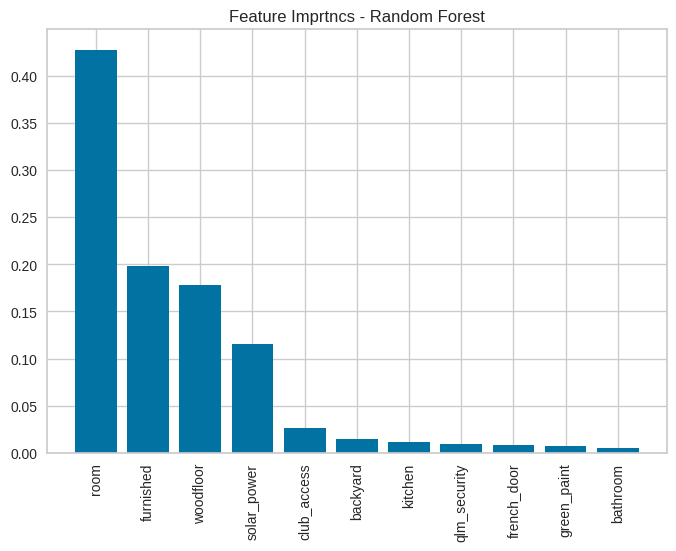

In [475]:
# Create plot
plt.bar(range(X.shape[1]), imprtncs[sorted_index])
plt.xticks(range(X.shape[1]), labels, rotation=90)
plt.title("Feature Imprtncs - Random Forest")
plt.show()

In [476]:
importances = rf_regmodel.feature_importances_
features = X_train.columns
total_importance = sum(importances)

# create tuples list with feature and importance %
importance_list = [(feature, round((importance/total_importance) * 100, 4)) for feature, importance in zip(features, importances)]

# sort the list by importance % in DSC
importance_list_sorted = sorted(importance_list, key=lambda x: x[1], reverse=True)

# create pandas dataframe from sorted list
importances_df = pd.DataFrame(importance_list_sorted, columns=['Feature', 'Importance (%)']).set_index('Feature')

print(importances_df)

              Importance (%)
Feature                     
room                 42.7519
furnished            19.7675
woodfloor            17.8273
solar_power          11.5170
club_access           2.5911
backyard              1.4622
kitchen               1.1362
qlm_security          0.8978
french_door           0.8892
green_paint           0.6909
bathroom              0.4688


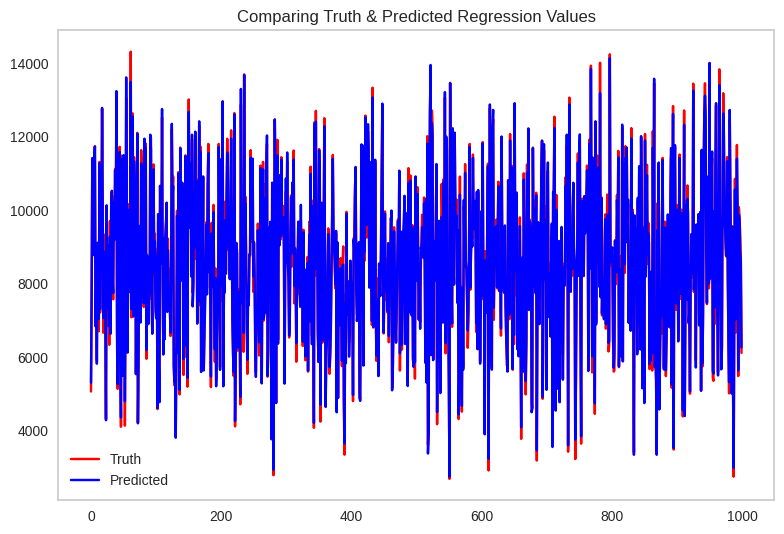

In [477]:
def mt_plot(truth, prediction):
    plt.plot(truth, color="red", label="Truth")
    plt.plot(prediction, color="blue", label="Predicted")
    plt.legend()
    plt.grid()
    plt.title("Comparing Truth & Predicted Regression Values")
    plt.tight_layout()
    plt.show()
mt_plot(Y_test, rf_predicted)

In [478]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [479]:
from pycaret.regression import *
# load the data
train_dt = pd.read_csv('/content/drive/MyDrive/My Files 2016/msc_training_dataset.csv')

,Description,Value
0,Session id,1328
1,Target,price
2,Target type,Regression
3,Original data shape,"(3000, 12)"
4,Transformed data shape,"(3000, 12)"
5,Transformed train set shape,"(2100, 12)"
6,Transformed test set shape,"(900, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,226.8138,80723.3087,284.1185,0.9825,0.0367,0.0281
1,222.1843,80855.2403,284.3506,0.9858,0.0389,0.0284
2,218.8067,75014.9995,273.8887,0.9837,0.0374,0.0282
3,215.1700,74641.0857,273.2052,0.9854,0.0336,0.0262
4,253.9190,104842.1250,323.7933,0.9783,0.0414,0.0313
5,225.3562,81582.4522,285.6264,0.9842,0.0375,0.0293
6,228.8224,92588.9976,304.2844,0.9817,0.0446,0.0300
7,207.7943,70843.4757,266.1644,0.9848,0.0329,0.0252
8,221.8624,81777.4248,285.9675,0.9833,0.0393,0.0291


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

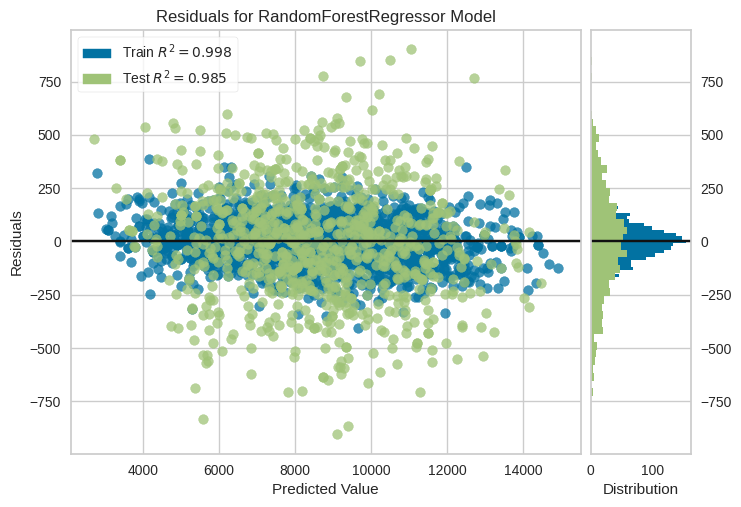

In [480]:
# setup the regression experiment with the train_dt dataset and 'Price' as the target variable
setup(train_dt, target='price')

# create random forest model
rf_model = create_model('rf')

# plot residuals
plot_model(rf_model, plot='residuals')

In [481]:
# Return an array containing the feature importance scores for each feature in the trained random forest model 
rf_regmodel.feature_importances_

array([0.42751861, 0.00468809, 0.01136195, 0.00889194, 0.01462206,
       0.19767504, 0.00690949, 0.11517045, 0.17827313, 0.00897817,
       0.02591108])

In [482]:
# Return the Index object containing each column labels
train_dt.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [483]:
# View which features are most important for predicting the target variable in the random forest regression model
impt_scr = zip(rf_regmodel.feature_importances_, train_dt.columns)
sorted_features = sorted(list(impt_scr), reverse=True)
# Generate the output in percentage
total_score = sum([score for score, feature in sorted_features])
for score, feature in sorted_features:
    score_percentage = round(score/total_score * 100, 4)
    print(f"{feature} - {score_percentage}%")

room - 42.7519%
furnished - 19.7675%
woodfloor - 17.8273%
solar_power - 11.517%
club_access - 2.5911%
backyard - 1.4622%
kitchen - 1.1362%
qlm_security - 0.8978%
french_door - 0.8892%
green_paint - 0.6909%
bathroom - 0.4688%


In [484]:
rf_imprtnc = rf_regmodel.feature_importances_
rf_regmodel.feature_names_in_
ranking_features = zip(rf_imprtnc, rf_regmodel.feature_names_in_)
ranking_features = sorted(ranking_features, reverse=True)
total_importance = sum(rf_imprtnc)
for x, y in ranking_features:
  print(x,y)

0.42751860545238657 room
0.1976750387935617 furnished
0.17827312591979913 woodfloor
0.11517045330099454 solar_power
0.02591107755049794 club_access
0.014622057069054076 backyard
0.011361951753313707 kitchen
0.008978174668507427 qlm_security
0.008891939653965673 french_door
0.006909489489235855 green_paint
0.004688086348683416 bathroom


In [485]:
# Get a list of feature names sorted in increasing order of importance
# Extract the feature names and importances and create two separate lists, cue and content, respectively.
cue = [c[1] for c in ranking_features] [::-1]
cue

['bathroom',
 'green_paint',
 'french_door',
 'qlm_security',
 'kitchen',
 'backyard',
 'club_access',
 'solar_power',
 'woodfloor',
 'furnished',
 'room']

In [486]:
content = [c[0] for c in ranking_features][::-1]
content
total_importance = sum(content)
for i in range(len(content)):
    content[i] = round((content[i]/total_importance)*100, 4)
    print(f"{content[i]}%")

0.4688%
0.6909%
0.8892%
0.8978%
1.1362%
1.4622%
2.5911%
11.517%
17.8273%
19.7675%
42.7519%


<BarContainer object of 11 artists>

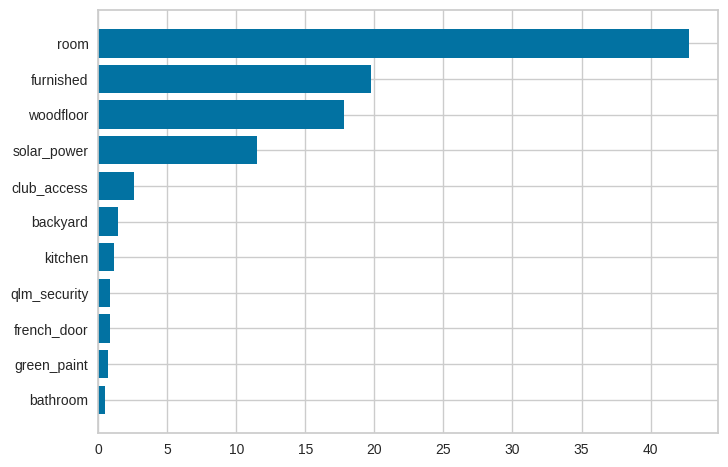

In [487]:
from sklearn.tree import plot_tree
plt.barh(cue,content)

In [488]:
# Perform cross-validation to estimate model performance on new data, and monitor model performance over time
from sklearn.model_selection import cross_val_score

# Perform a 5-fold cross-validation to estimate the model performance
scores = cross_val_score(rf_regmodel, X_train, Y_train, cv=5, scoring='r2')

# Print average R-squared score
print('Average R-squared score:', np.mean(scores))

Average R-squared score: 0.9866638937721459


# **XGBOOST**

In [489]:
import xgboost as Xbooster
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train XGBoost model
Xbooster_regm = Xbooster.XGBRegressor().fit(X_train, Y_train)
Xbooster_regm

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [490]:
# Predict on test set using trained model
Xbooster_predict = Xbooster_regm.predict(X_test)
Xbooster_predict

array([ 5148.416 ,  7656.7046, 11278.064 ,  8745.116 , 11127.099 ,
       11222.3955, 11739.574 ,  6848.711 ,  7767.5234,  5909.1157,
        9033.005 ,  8422.511 ,  6652.882 , 11309.728 ,  7162.8477,
        9100.832 ,  8863.883 , 12851.478 ,  9680.847 ,  6732.82  ,
        9311.709 ,  7718.399 ,  7035.023 ,  4374.608 ,  9984.954 ,
        6940.473 ,  7280.7275,  8873.837 ,  6341.4707,  9618.7705,
        6653.249 , 10322.769 , 10497.256 ,  8144.93  ,  7646.1826,
       10347.003 ,  9462.381 , 11102.428 ,  9790.52  , 12912.751 ,
        6383.6855,  5167.9097,  9914.373 ,  8879.723 , 11695.252 ,
        6201.2173,  4218.778 , 11469.141 ,  9645.313 ,  5652.9897,
       11424.627 , 10264.246 ,  4340.5767,  7817.545 , 12937.625 ,
        9641.915 ,  6529.354 ,  8377.5205, 10059.843 ,  7821.1494,
        8286.929 , 14146.023 ,  7092.825 ,  8442.184 , 12650.5205,
        6948.8447, 11425.142 , 10575.425 , 10027.336 ,  5470.0005,
        8214.382 , 12130.265 ,  4323.3804,  5942.8584,  9350.5

In [491]:
# Create a new column for the predicted price and drop previous price difference and random forest predicted price
test_dt['Xbooster_predict'] = Xbooster_regm.predict(X_test)
test_dt = test_dt.drop(['price_difference', 'Reg_Pred_X'], axis=1)
test_dt

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Xbooster_predict
0,1,1,1,3,0,0,1,1,0,1,0,5068,5148.416016
1,5,1,1,2,0,0,0,0,0,1,1,7658,7656.704590
2,5,1,1,3,0,0,0,1,1,1,1,11318,11278.064453
3,4,2,2,1,0,1,1,0,0,1,0,8858,8745.116211
4,5,2,1,1,0,1,1,1,0,0,1,11178,11127.098633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9970.373047
995,5,1,2,3,1,1,0,0,0,0,0,9788,9773.116211
996,3,2,2,1,0,1,1,1,0,1,0,9388,9389.592773
997,3,2,1,1,1,0,0,1,1,0,0,8528,8573.990234


In [492]:
# Create a new column for the difference between the actual price and the predicted price
test_dt['price_difference'] = test_dt['price'] - test_dt['Xbooster_predict']
test_dt

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,Xbooster_predict,price_difference
0,1,1,1,3,0,0,1,1,0,1,0,5068,5148.416016,-80.416016
1,5,1,1,2,0,0,0,0,0,1,1,7658,7656.704590,1.295410
2,5,1,1,3,0,0,0,1,1,1,1,11318,11278.064453,39.935547
3,4,2,2,1,0,1,1,0,0,1,0,8858,8745.116211,112.883789
4,5,2,1,1,0,1,1,1,0,0,1,11178,11127.098633,50.901367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088,9970.373047,117.626953
995,5,1,2,3,1,1,0,0,0,0,0,9788,9773.116211,14.883789
996,3,2,2,1,0,1,1,1,0,1,0,9388,9389.592773,-1.592773
997,3,2,1,1,1,0,0,1,1,0,0,8528,8573.990234,-45.990234


In [493]:
# Extract feature importances using XGBoost and print them
Xbooster_imprt = Xbooster_regm.feature_importances_
Xbooster_imprt = 100.0 * (Xbooster_imprt / Xbooster_imprt.sum())  # Normalize to 100%
Xbooster_rnks_n_ftrs = zip(Xbooster_imprt, rf_regmodel.feature_names_in_)
Xbooster_rnks_n_ftrs = sorted(Xbooster_rnks_n_ftrs, reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in Xbooster_rnks_n_ftrs:
    print("{:.4f}% -\t{}".format(x, y))


Feature Importances with XGBoost:
29.9776% -	room
24.1706% -	woodfloor
23.6470% -	furnished
11.2140% -	solar_power
2.6595% -	club_access
1.9724% -	backyard
1.6965% -	qlm_security
1.4970% -	kitchen
1.1910% -	french_door
1.1131% -	green_paint
0.8613% -	bathroom


In [494]:
# Calculate evaluation metrics
Rsqr = r2_score(Y_test, Xbooster_predict)
Mmse = mean_squared_error(Y_test, Xbooster_predict)
Rmse = np.sqrt(Mmse)
Mmae = mean_absolute_error(Y_test, Xbooster_predict)
# Print evaluation metrics
print(f"R2 Score: {Rsqr:.4f}")
print(f"Mean Squared Error: {Mmse:.4f}")
print(f"Root Mean Squared Error: {Rmse:.4f}")
print(f"Mean Absolute Error: {Mmae:.4f}")

R2 Score: 0.9987
Mean Squared Error: 6373.5408
Root Mean Squared Error: 79.8345
Mean Absolute Error: 60.1430


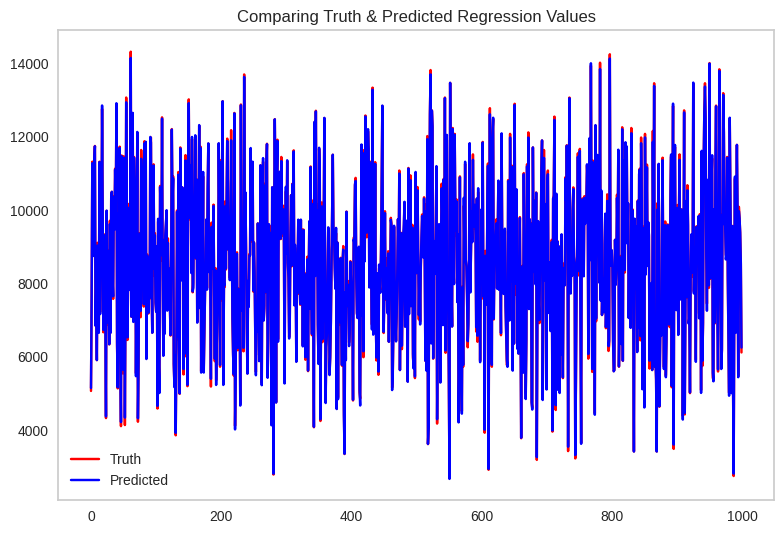

In [495]:
def mt_plot(truth, prediction):
    plt.plot(truth, color="red", label="Truth")
    plt.plot(prediction, color="blue", label="Predicted")
    plt.legend()
    plt.grid()
    plt.title("Comparing Truth & Predicted Regression Values")
    plt.tight_layout()
    plt.show()
mt_plot(Y_test, Xbooster_predict)

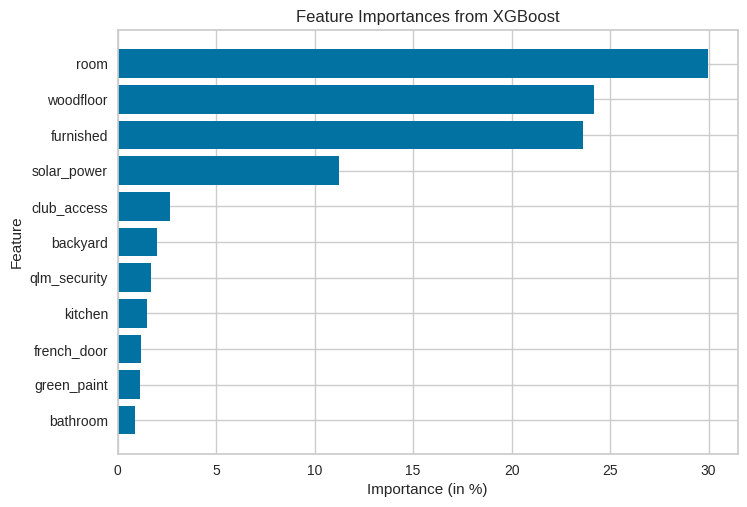

In [496]:
# Get feature names from the dataframe
feature_names = list(X_train.columns)

# Create a dictionary of feature names and importances
feature_importances = dict(zip(feature_names, Xbooster_imprt))

# Sort the feature importances in descending order
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1]))

# Create a bar chart of feature importances
plt.barh(range(len(sorted_feature_importances)), list(sorted_feature_importances.values()), align='center')
plt.yticks(range(len(sorted_feature_importances)), list(sorted_feature_importances.keys()))
plt.xlabel("Importance (in %)")
plt.ylabel("Feature")
plt.title("Feature Importances from XGBoost")
plt.show()

In [497]:
# Perform a cross-validation to estimate model performance on new data, and on over time
from sklearn.model_selection import cross_val_score

# Perform a 5-fold cross-validation to estimate how weel the model is performing
scores = cross_val_score(Xbooster_regm, X_train, Y_train, cv=5, scoring='r2')

# Print average R-squared score
print('Average R-squared score:', np.mean(scores))

Average R-squared score: 0.998394143127145


Compare all machine learning algorithm used for which is the best performing model

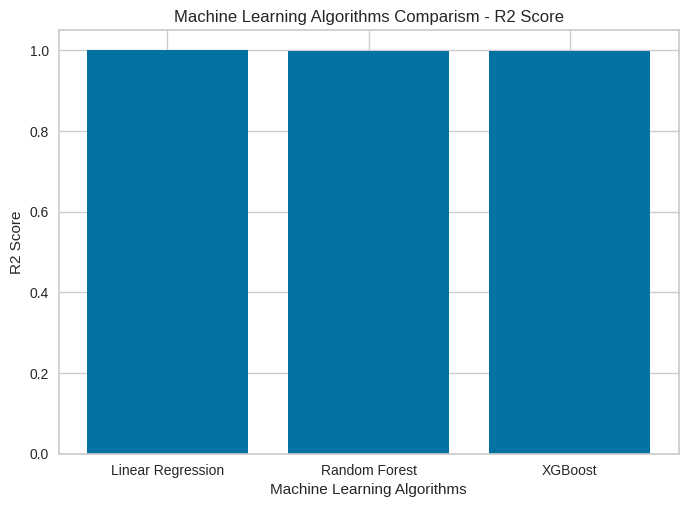

In [498]:
ML_models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [1.0000, 0.9985, 0.9987]
plt.bar(ML_models, r2_scores)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('R2 Score')
plt.title('Machine Learning Algorithms Comparism - R2 Score')
plt.show()

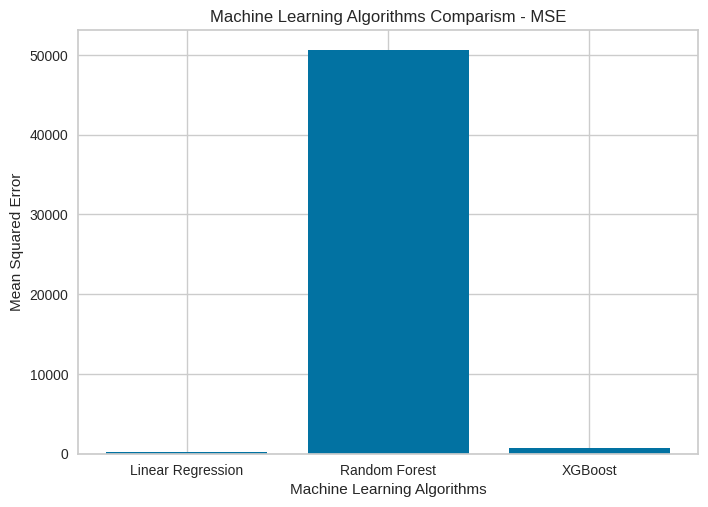

In [499]:
ML_models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_values = [169.0000, 50575.4136, 673.5408]
plt.bar(ML_models, mse_values)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Squared Error')
plt.title('Machine Learning Algorithms Comparism - MSE')
plt.show()

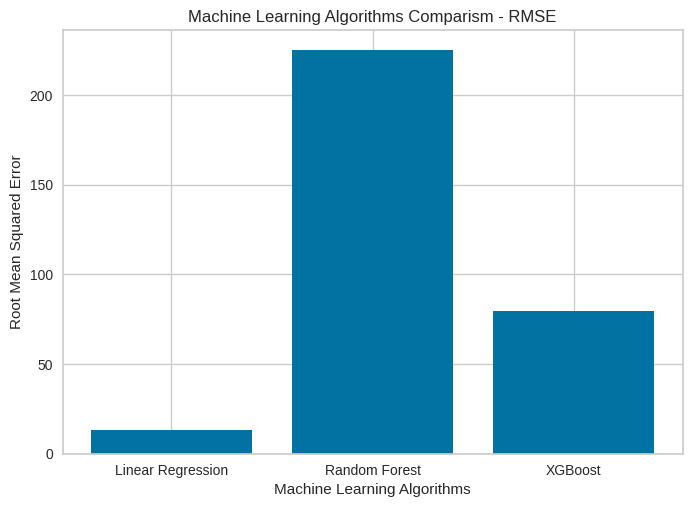

In [500]:
ML_models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_values = [13.0000, 224.8898, 79.8345]

plt.bar(ML_models, rmse_values)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Root Mean Squared Error')
plt.title('Machine Learning Algorithms Comparism - RMSE')
plt.show()

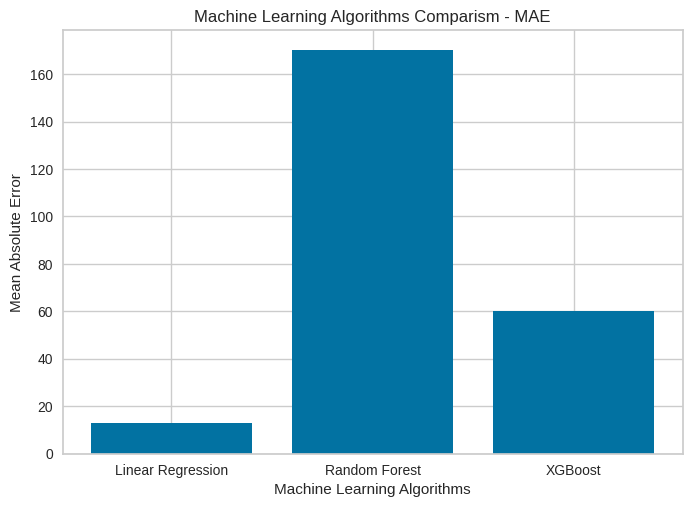

In [501]:
ML_models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_values = [13.0000, 170.0057, 60.1430]

plt.bar(ML_models, mae_values)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Mean Absolute Error')
plt.title('Machine Learning Algorithms Comparism - MAE')

plt.show()

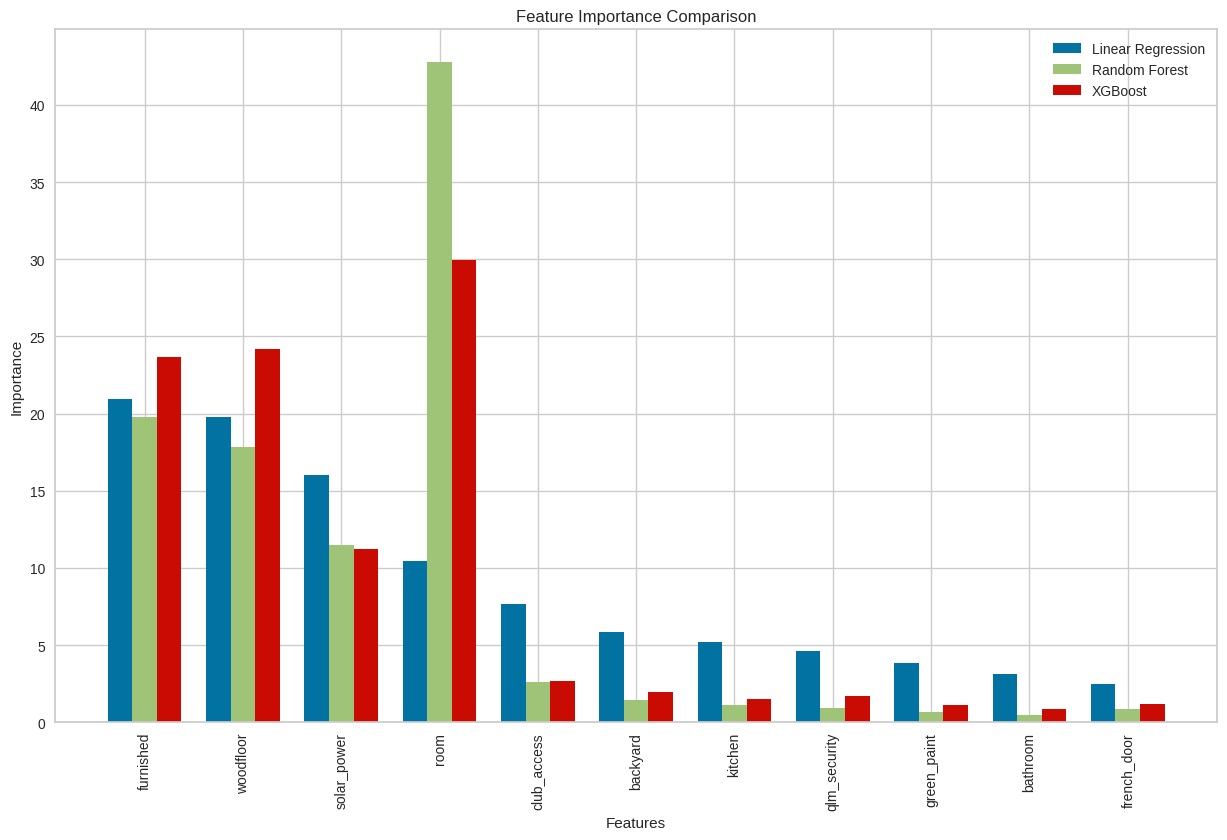

In [502]:
# Assign the features
features = ['furnished', 'woodfloor', 'solar_power', 'room', 'club_access',
            'backyard', 'kitchen', 'qlm_security', 'green_paint', 'bathroom', 'french_door']
linear_regression = [20.9205, 19.7699, 16.0042, 10.4603, 7.6360, 5.8577, 5.2301, 4.6025, 3.8703, 3.1381, 2.5105]
random_forest = [19.7675, 17.8273, 11.5170, 42.7519, 2.5911, 1.4622, 1.1362, 0.8978, 0.6909, 0.4688, 0.8892]
xgboost = [23.6470, 24.1706, 11.2140, 29.9776, 2.6595, 1.9724, 1.4970, 1.6965, 1.1131, 0.8613, 1.1910]
# Assing x-axis positions
x_pos = np.arange(len(features))
# figure and axes objects
fig, ax = plt.subplots(figsize=(15, 9))
# Define each bar sizes
bar_width = 0.25
ax.bar(x_pos - bar_width, linear_regression, bar_width, label='Linear Regression')
ax.bar(x_pos, random_forest, bar_width, label='Random Forest')
ax.bar(x_pos + bar_width, xgboost, bar_width, label='XGBoost')
# Add labels, title, and legend
ax.set_xticks(x_pos)
ax.set_xticklabels(features, rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.legend()
# Show plot
plt.show()